# 6.1 Linear Least Squares Tasks

## Simple Setup to get started

First, we'll need to generate a set of data points that roughly follow a linear trend but with some noise added. We'll use the function $f(x) = 2x + 3$ to generate the $y_i$ values. We'll then add some Gaussian noise to the $y_i$ values to simulate real-world measurements.

In [1]:
using Pkg
# Pkg.generate("learningF")
Pkg.activate("learningF")
Pkg.add("Plots")
Pkg.add("Statistics")
Pkg.add("CSV")
Pkg.instantiate()

  Activating project at `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF`


   Resolving package versions...


  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF/Project.toml`
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF/Project.toml`
  No Changes to `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF/Manifest.toml`


   Resolving package versions...


    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF/Project.toml`
  [336ed68f] + CSV v0.10.11
    Updating `~/Library/Mobile Documents/com~apple~CloudDocs/Projects/numerical_methods/06-LeastSquares/learningF/Manifest.toml`
  [336ed68f] + CSV v0.10.11
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.9.20
  [842dd82b] + InlineStrings v1.4.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [2dfb63ee] + PooledArrays v1.4.2
  [91c51154] + SentinelArrays v1.4.0
  [3783bdb8] + TableTraits v1.0.1
  [bd369af6] + Tables v1.10.1
  [ea10d353] + WeakRefStrings v1.4.2
  [76eceee3] + WorkerUtilities v1.6.1
  [9fa8497b] + Future


Precompiling project...


  ✓ CSV


  ✓ learningF
  2 dependencies successfully precompiled in 8 seconds. 146 already precompiled.


In [2]:
using Plots
using Statistics
using CSV                               # CSV Parser

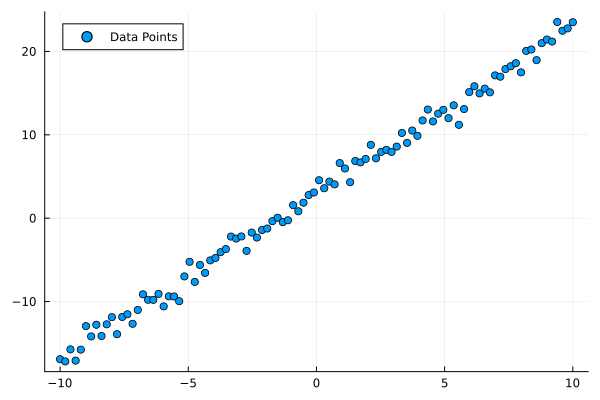

In [3]:
# Generate x values
x = LinRange(-10, 10, 100)

# Generate y values with added noise
y = 2 .* x .+ 3 + randn(length(x))

# Plot the data points
scatter(x, y, label="Data Points")

### Task: Matrix Formation

The next step is to form the matrix $A$. 

1. Construct the matrix $A$. Remember, the first column should be all ones (for the constant term in the linear function) and the second column should be the $x_i$ values.

In [4]:
n = length(x)
A = [ones(n) x]

100×2 Matrix{Float64}:
 1.0  -10.0
 1.0   -9.79798
 1.0   -9.59596
 1.0   -9.39394
 1.0   -9.19192
 1.0   -8.9899
 1.0   -8.78788
 1.0   -8.58586
 1.0   -8.38384
 1.0   -8.18182
 ⋮    
 1.0    8.38384
 1.0    8.58586
 1.0    8.78788
 1.0    8.9899
 1.0    9.19192
 1.0    9.39394
 1.0    9.59596
 1.0    9.79798
 1.0   10.0

### Task: Solving the Normal Equations

Now, we are ready to solve the normal equations to get the least squares solution.

1. Compute the matrix $A^T A$ and the vector $A^T y$ in a seperate cell and view the results.

In [5]:
# Compute the matrix $A^T A$ and the vector $A^T y$
AtA = A' * A

2×2 Matrix{Float64}:
 100.0             6.39488e-14
   6.39488e-14  3400.67

In [6]:
# Compute the vector $A^T y$
Aty = A' * y

2-element Vector{Float64}:
  294.52788373577926
 6776.516843988026

2. Solve the system of equations $A^T A p = A^T y$ to find $p$ 

In [7]:
# Solve the linear system $A^T A p = A^T y$
p = AtA \ Aty

2-element Vector{Float64}:
 2.9452788373577916
 1.9926985174895486

### Task: Verification

Finally, verify the solution you obtained. 

1. Compute the residuals $r_i$ and the total  mean squared error.

2. Plot the original data points, the true line $f(x)$, and the line corresponding to your solution. 

In [8]:
# Compute the residuals $r_i$ and the total mean squared error
residuals = y - A * p
error = Statistics.mean(residuals .^ 2)

0.812764626150075

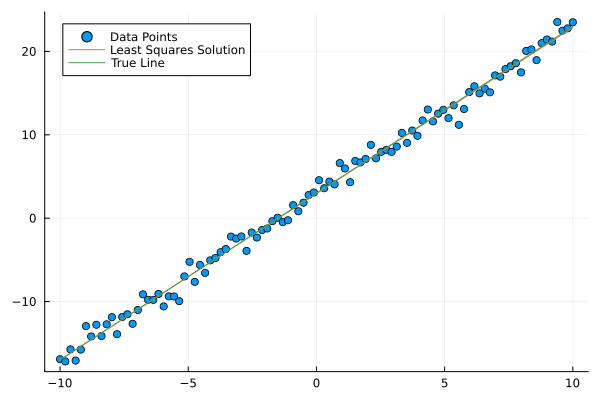

In [9]:
# Plot the original data points, the true line $f(x)$, and the line corresponding to your solution.
plot!(x, p[1] .+ p[2] .* x, label="Least Squares Solution")
plot!(x, 2 .* x .+ 3, label="True Line")

### Task: Using the Julia built-in function
You can use also the build in function `\` to solve linear equations in Julia since it uses the least squares method if the system is overdetermined. 

1. Build a linear equation of type $Ax=b$ and solve it with the `\` function. Compare the result with the solution you obtained erlier.

Error: 0.8127646261500749


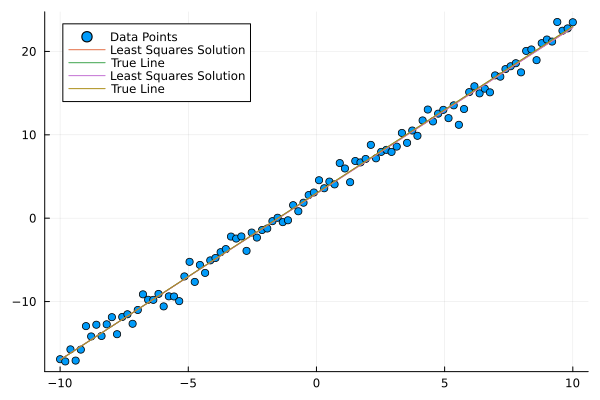

In [10]:
# Solve the linear equation using the build in function
A = [ones(length(x)) x]
b = y
p = A \ b

# Compute the residuals $r_i$ and the total mean squared error
residuals = y - A * p
error = Statistics.mean(residuals .^ 2)
println("Error: ", error)

# Plot the original data points, the true line $f(x)$, and the line corresponding to your solution.
plot!(x, p[1] .+ p[2] .* x, label="Least Squares Solution")
plot!(x, 2 .* x .+ 3, label="True Line")

### Task: Implement a function that computes the least squares solution
Now we want to implement a function that computes the least squares solution for a given set of data points $(x_i, y_i)$, $i=1,\ldots,n$.

1. Implement a function `least_squares` that takes as input the vectors $x$ and $y$ and returns the least squares solution $p^*$ together with the matrix $A$. 

In [11]:
function least_squares(x, y)
    n = length(x)
    A = [ones(n) x]
    b = y
    p = A \ b
    p, A
end

least_squares (generic function with 1 method)

In [12]:
p, A = least_squares(x, y)
residuals = y - A * p
error = Statistics.mean(residuals .^ 2)
println("Error: ", error)

Error: 0.8127646261500749


## Linear Least Squares using real world data

We measured the current $I$ of the first joint of our Openmanipulator robot for different goal currents $I_g$ and obtained the following data points seen in the image below: 

<img src="./omp_currents.png">

We want to find a linear function $I = f(I_g)$ that describes the relationship between the goal current $I_g$ and the actual current $I$. We want to know how accuarate we can predict the actual current $I$ for a given goal current $I_g$. Fist let's load the data points into Julia.

In [13]:
csv = CSV.File(joinpath(@__DIR__, "omp_currents.csv"))      # load and parse csv

x_train = csv.columns[5].column                      # mask column 5 (Goal Current)
y_train = csv.columns[4].column                      # mask column 4 (Present Current)

# x_train = x[1:1000]                       # take the first 800 values
# y_train = y[1:1000]                       # take the first 800 values

mean = Statistics.mean(x_train)           # calculate the mean
std = Statistics.std(x_train)             # calculate the variance

function dataPreProcess(x, y)
    x = Float64.(x)
    y = Float64.(y)
    # make the data zero mean and unit variance
    x = x .- mean
    x = x ./ std
    y = y .- mean
    y = y ./ std
    x, y
end

# data post procseeing (make it human frindly)
function dataPostProcess(x, y)
    x = x .* std
    x = x .+ mean
    y = y .* std
    y = y .+ mean
    x, y
end

# data pre processing
x_train, y_train = dataPreProcess(x_train, y_train)

([1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646, 1.4967109895580646  …  -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576], [1.7486100005861305, 1.460725416554055, 1.4967109895580646, 1.4967109895580646, 1.4787182030560597, 1.4787182030560597, 1.4787182030560597, 1.4787182030560597, 1.4427326300520504, 1.4787182030560597  …  -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576, -0.06866143611634576])

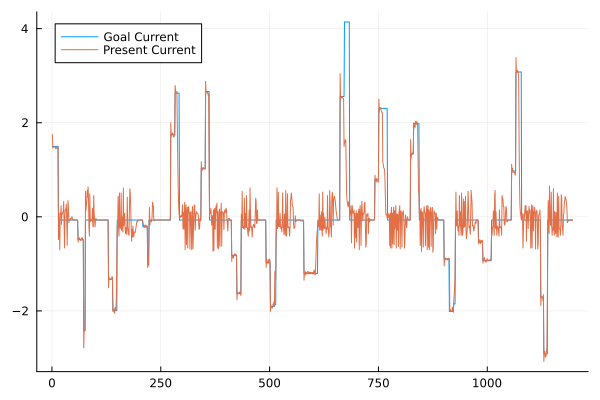

In [14]:
# plot the goal current vs the present current
plot(x_train, label="Goal Current")
plot!(y_train, label="Present Current")

### Task: Compute the parameters of the linear function
Now we want to compute the parameters $p_1$ and $p_2$ of the linear function $I = f(I_g) = p_1*I_g + p_2$ that best fits the data points.

1. Compute the parameters $a$ and $b$ of the linear function $I = f(I_g) =p_1*I_g + p_2$ that best fits the data points using the least squares method you implemented earlier.

2. Estimate the mean squared error of the linear function.

In [15]:
p, A = least_squares(x_train, y_train)
residuals = y_train - A * p
error = Statistics.mean(residuals .^ 2)
println("Error: ", error)

Error: 0.1878335628013888


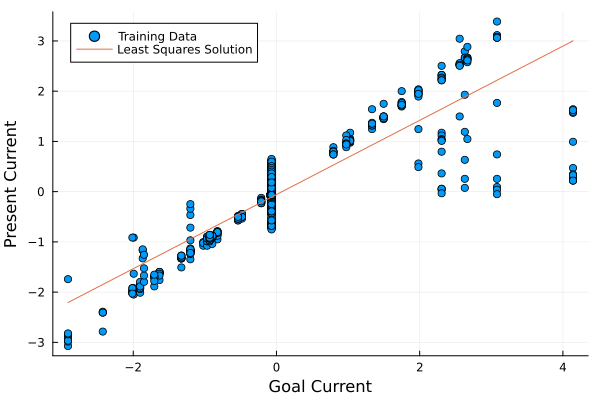

In [16]:
# Plot the original data points and the line corresponding to your solution
scatter(x_train, y_train, xlabel="Goal Current", ylabel="Present Current", label="Training Data", legend=:topleft)
# plot the least squares solution
plot!(x_train, p[1] .+ p[2] .* x_train, label="Least Squares Solution")

## Solving underdetermined systems using the pseudoinverse
If we have a linear system $Ax = b$ with more unknowns than equations, i.e. $A$ is rank deficient, then we cannot use the known tools to find a solution $x$ such that $Ax = b$. We can however define: 

$$
B = A^T
$$

and use the pseudoinverse of $B^+$ 

$$
B^+ = (B^T B)^{-1} B^T
$$

with 

$$
(B^+)^T = A^T (A A^T)^{-1}
$$

Hence, if we use the pseudoinverse of the system we find the solution with minimal norm, i.e. the solution that minimizes $\|x\|$. In this exercise we will use the pseudoinverse to find the least squares solution of an underdetermined system of equations.

### Setup

We first need to create an underdetermined system of equations. Let's make this system a little simpler for ease of computation.

In [17]:
# A 2x3 matrix $A$ with random values.
A = rand(2, 3)

# 2-dimensional vector $b$ also with random values.
b = rand(2)

2-element Vector{Float64}:
 0.9739970730976951
 0.7115836401765812

### Task: Compute the Pseudoinverse

Now we will compute the pseudoinverse $B^+$ of the transposed matrix $B = A^T$.

1. Compute the matrix $B$ by transposing $A$.

2. Compute the pseudoinverse $B^+$ using the formula provided. Note that this might involve computing a matrix inverse.

In [18]:
# Compute the matrix $B$ by transposing $A$.
B = A'

# Compute the pseudoinverse $B^+$ using B^+ = (B^T B)^{-1} B^T
B⁺ = inv(B' * B) * B'

2×3 Matrix{Float64}:
 -3.46345   5.21713  0.433586
  2.35519  -2.27159  0.24386

### Task: Solve the Underdetermined System

With the pseudoinverse $B^+$, we can now solve for $x$.

1. Compute the solution $x = (B^+)^T b$.

2. Print the solution $x$.

In [19]:
# Compute the solution $x = (B^+ b$.
x = B⁺' * b

# Print the solution $x$.
println("x = ", x)

x = [-1.6974798459988556, 3.4650454058416424, 0.5958384605346216]


### Task: Verification

Finally, we should verify the solution we obtained.

1. Compute the vector $Ax$ and compare it with $b$. Given that we have an underdetermined system, they do not have to be the same.

2. Compute the norm of $x$ 

3. Compare your solution with the one obtained using the function `\`. Also compare the norm of the solution obtained with `\` with the norm of the solution obtained with the pseudoinverse.

In [21]:
# Compute the vector $Ax$ and compare it with $b$. Given that we have an underdetermined system, they are not likely to be the same.
println("Ax = ", A * x)
println("b = ", b)

# Compute the norm of $x$ and discuss why this solution is preferable when we have an underdetermined system.
println("norm(x) = ", Statistics.norm(x))

# compare to \
x = A \ b
println("x = ", x)
println("norm(x) = ", Statistics.norm(x))

Ax = [0.9739970730976945, 0.7115836401765818]
b = [0.9739970730976951, 0.7115836401765812]
norm(x) = 3.9042286002703324
x = [-1.6974798459988583, 3.465045405841648, 0.5958384605346202]
norm(x) = 3.9042286002703386
